# Tour the World with Landsat Imagery and Raster Functions

This notebook provides links to interesting locations using different band combinations of Landsat 8 imagery. A general description is provided for each location. The maps are live and you can navigate to any other location of the World and see the same bands.

This notebook uses Landsat 8 imagery layer that is accessible from ArcGIS Online. The Landsat 8 imagery layer provides multiple scenes for every location and is updated with new scenes every day from USGS. The scenes can be used for both visualization and analysis. Typically, all locations are covered every 16 days.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tour-the-World-with-Landsat-Imagery-and-Raster-Functions" data-toc-modified-id="Tour-the-World-with-Landsat-Imagery-and-Raster-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tour the World with Landsat Imagery and Raster Functions</a></span><ul class="toc-item"><li><span><a href="#Landsat-imagery" data-toc-modified-id="Landsat-imagery-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Landsat imagery</a></span></li><li><span><a href="#Raster-processing" data-toc-modified-id="Raster-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Raster processing</a></span></li><li><span><a href="#Cambridge-Gulf,-Australia" data-toc-modified-id="Cambridge-Gulf,-Australia-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cambridge Gulf, Australia</a></span></li><li><span><a href="#Eye-of-the-Sahara,-Mauritania" data-toc-modified-id="Eye-of-the-Sahara,-Mauritania-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Eye of the Sahara, Mauritania</a></span></li><li><span><a href="#Gosses-Bluff,-Australia" data-toc-modified-id="Gosses-Bluff,-Australia-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Gosses Bluff, Australia</a></span></li><li><span><a href="#Exumas,-Bahamas" data-toc-modified-id="Exumas,-Bahamas-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exumas, Bahamas</a></span></li><li><span><a href="#Mexico-City,-Mexico" data-toc-modified-id="Mexico-City,-Mexico-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Mexico City, Mexico</a></span></li><li><span><a href="#Central-Saudi-Arabia" data-toc-modified-id="Central-Saudi-Arabia-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Central Saudi Arabia</a></span></li></ul></li><li><span><a href="#Bahr-al-Milh,-Iraq" data-toc-modified-id="Bahr-al-Milh,-Iraq-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bahr al Milh, Iraq</a></span></li></ul></div>

## Landsat imagery

ArcGIS Online provides multispectral landsat imagery layer, that we'll be using in this notebook. Let's connect to ArcGIS Online as an anonymous user and query for the "Landsat Multispectral" imagery layer:

In [1]:
from arcgis.gis import GIS

In [2]:
from arcgis.raster.functions import *

In [3]:
## connect as an anonymous user
gis = GIS()

In [4]:
landsat_item = gis.content.search('"Multispectral Landsat"', 'Imagery Layer')[0]

In [5]:
landsat_item

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

In [6]:
landsat = landsat_item.layers[0]

## Raster processing

The examples below will be extracting a particular band combination from the landsat layer, and applying a 'Percent Clip' stretch to enhance the raster so it looks more vibrant. Here, we define a Python function that will first use the `extract_band` raster function to extract the specified band combination from the input raster, and then feed the output to the `stretch` raster function. This function will be used by each example below to display different points of interest around the world.

In [7]:
def extract_stretch(bandids):
    return stretch(extract_band(landsat, bandids),
                   stretch_type='PercentClip',
                   min_percent=2, 
                   max_percent=2,
                   dra=True, 
                   gamma=[0.8,0.8,0.8])

## Cambridge Gulf, Australia

Cambridge Gulf is on an isolated stretch of the north coast of Western Australia. Mangroves thrive in this region that experiences wide tidal flows of 23-30 feet.

Green vegetation appears green in this band combination. The blue band is set to the blue channel here, so the water appears blue. There is a lot of sediment in the water, which can be seen here.


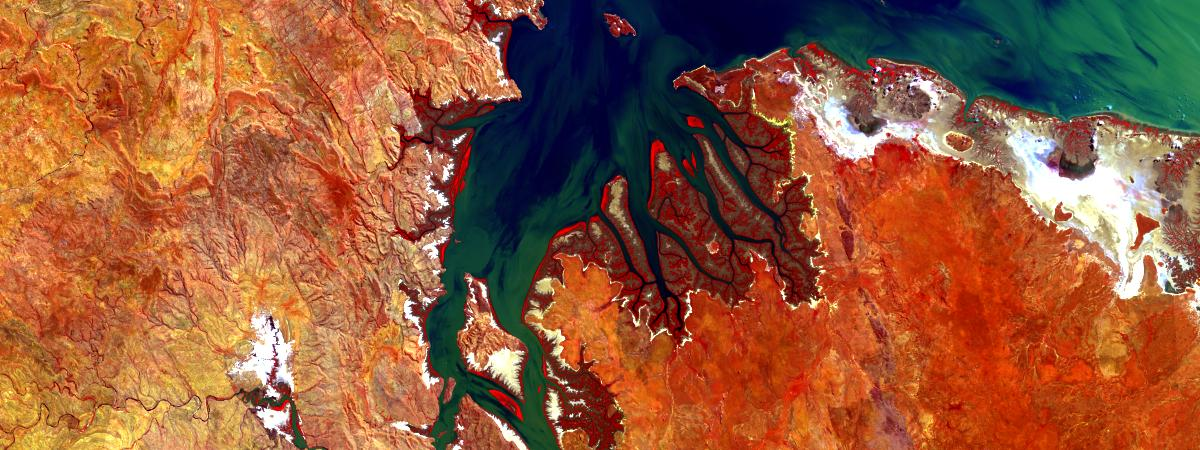

In [8]:
cambridge_gulf = extract_stretch([5, 4, 1])
cambridge_gulf.extent = {'xmax': 128.96, 'xmin': 127.62, 'ymax': -14.72, 'ymin': -15.25, 'spatialReference': 4326}
cambridge_gulf

## Eye of the Sahara, Mauritania

The Richat Structure of central Mauritania is also known as the Eye of the Sahara. It is a prominent geologic feature in the Sahara Desert, likely an eroded dome.
Since this image is largely devoid of vegetation, bands are used to emphasize the geologic structure. These particular bands are not always used for geology, site specific minerals and characteristics may call for a different combination.

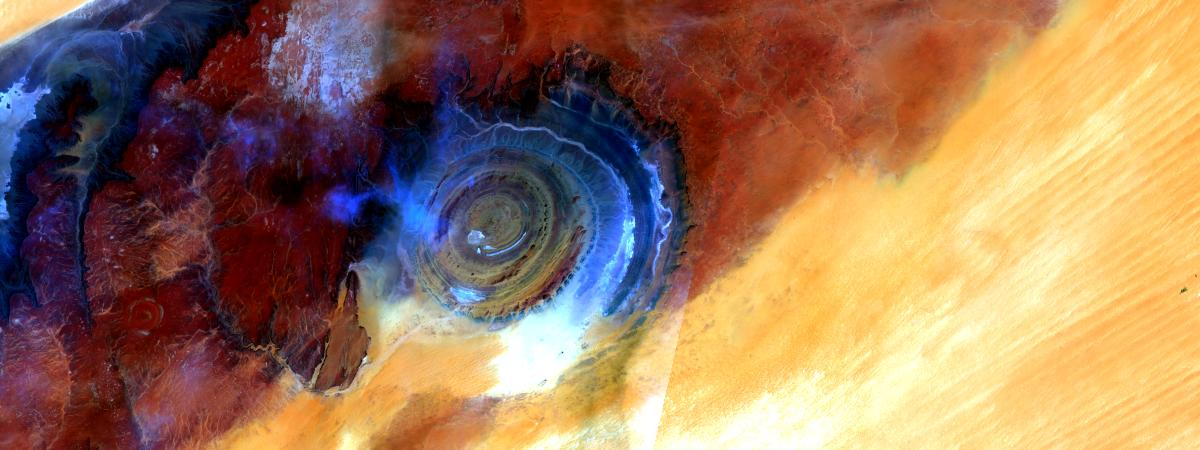

In [9]:
eye_of_sahara = extract_stretch([6,3,1])
eye_of_sahara.extent = {'xmax': -10.6, 'xmin': -11.94, 'ymax': 21.38, 'ymin': 20.86, 'spatialReference': 4326}
eye_of_sahara

## Gosses Bluff, Australia

In this map, the circular ring of hills is part of a unique and spectacular geological structure known as Gosses Bluff. Gosses Bluff was formed some 142 million years ago due to the impact of an asteroid or comet up to 1.2 miles (2 kilometers) in diameter. The central ring of hills is approximately 3 miles (5 kilometers) in diameter and rises 200 meters above the plain. It is surrounded by a circular drainage system 15 miles (24 kilometers) in diameter that marks the outer ring of the crater. Gosses Bluff has been the subject of intensive geological and geophysical scientific study and is deeply significant to the Western Arrernte Aboriginal people who own the Tnorala Conservation Reserve that contains the crater.

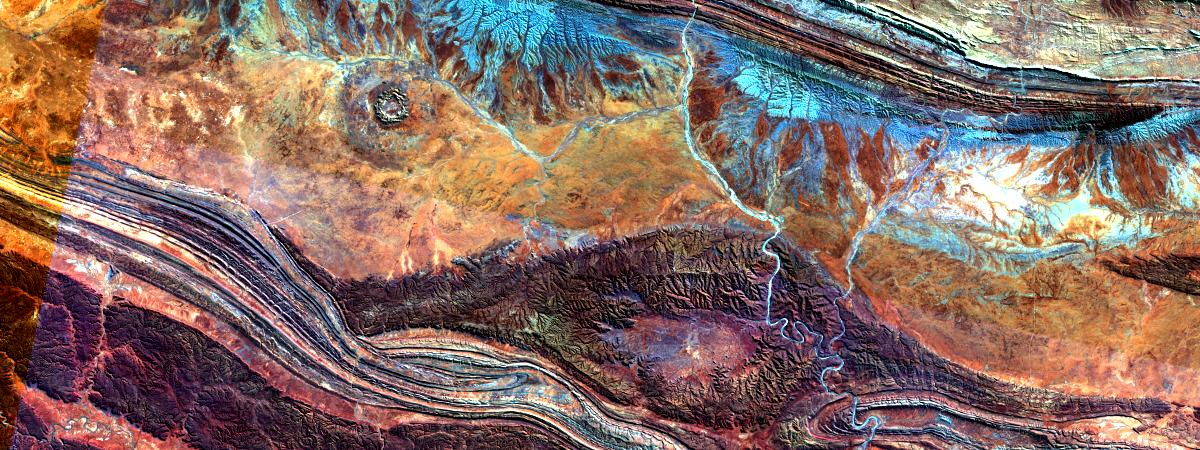

In [10]:
gosses_bluff = extract_stretch([6,3,1])
gosses_bluff.extent = {'xmax': 133.23, 'xmin': 131.89, 'ymax': -23.7, 'ymin': -24.2, 'spatialReference': 4326}
gosses_bluff

## Exumas, Bahamas

The Exumas are an archipelago of 365 cays and islands, beginning just 35 miles southeast of Nassau. In clear water, Landsat sensors can penetrate nearly 100 feet (30m).

The water is so clear and shallow in this area that underwater features are easily distinguished. Green vegetation appears red.

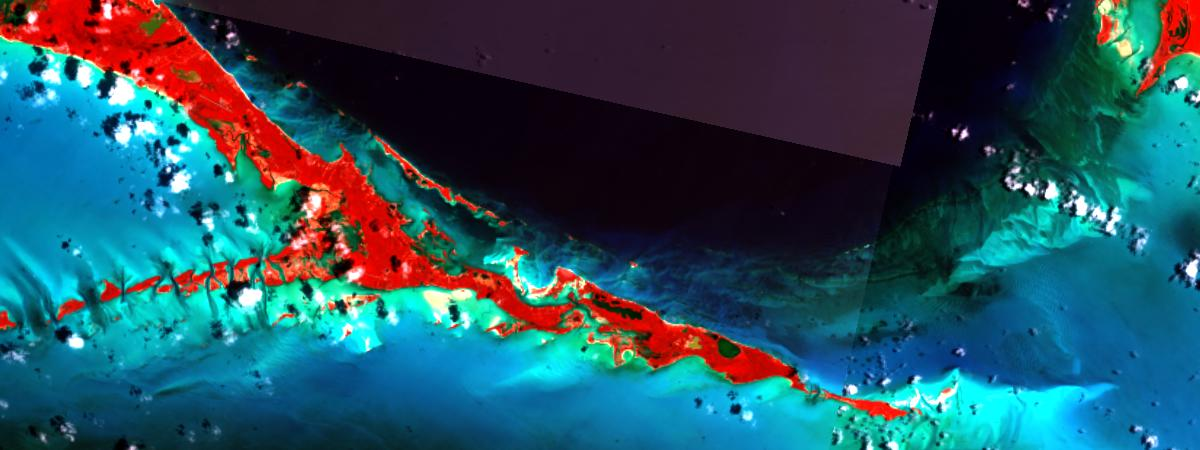

In [11]:
exumas_bahamas = extract_stretch([5, 3, 0])
exumas_bahamas.extent = {'xmax':-75.31, 'xmin':-75.98, 'ymax':23.62, 'ymin':23.37, 'spatialReference':4326}
exumas_bahamas

## Mexico City, Mexico

Mexico City, the capital city of Mexico, is situated on a highland plateau that is 1.5 miles above sea level (7,350 feet). The greater Mexico City area is home to over 21 million people.

Short-wave Infrared with DRA (7,6,4): This band combination is used so that green vegetation appears green in the image.

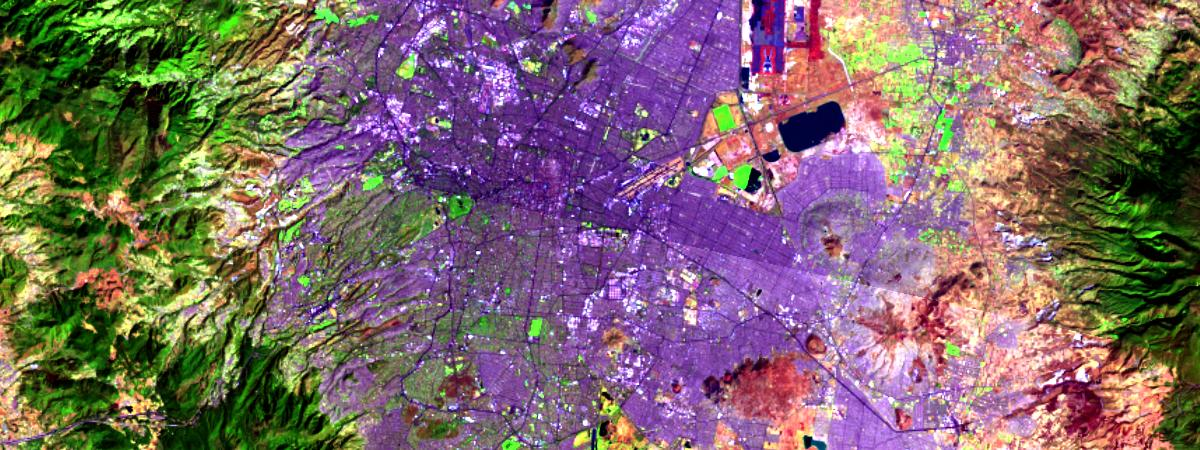

In [12]:
mexico_city = extract_stretch([6, 5, 3])
mexico_city.extent = {'xmax': -98.76, 'xmin': -99.44, 'ymax': 19.54, 'ymin': 19.28,'spatialReference': 4326}
mexico_city

## Central Saudi Arabia

Center-pivot irrigation agriculture in Saudi Arabia is used to grow crops such as wheat. The irrigation systems extend beyond the image areas throughout the Buradah-Riyadh region of Saudi Arabia.
 
Agriculture with DRA (6,5,2): Green vegetation appears green in this band combination.

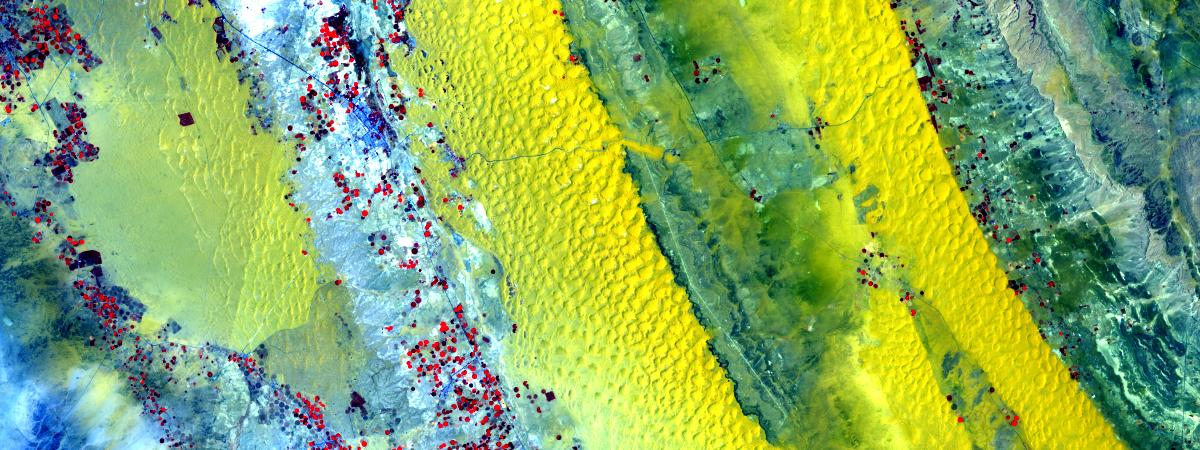

In [13]:
central_saudi_arabia = extract_stretch([5, 4, 1])
central_saudi_arabia.extent = {'xmax': 45.18, 'xmin': 43.82, 'ymax': 26.0, 'ymin': 25.5, 'spatialReference': 4326}
central_saudi_arabia

# Bahr al Milh, Iraq
Bahr al Milh is a salt sea in Iraq, fed by the Euphrates River via canal. Water levels of the shallow lake vary with the seasons; however, levels have been drastically low in the past decade.



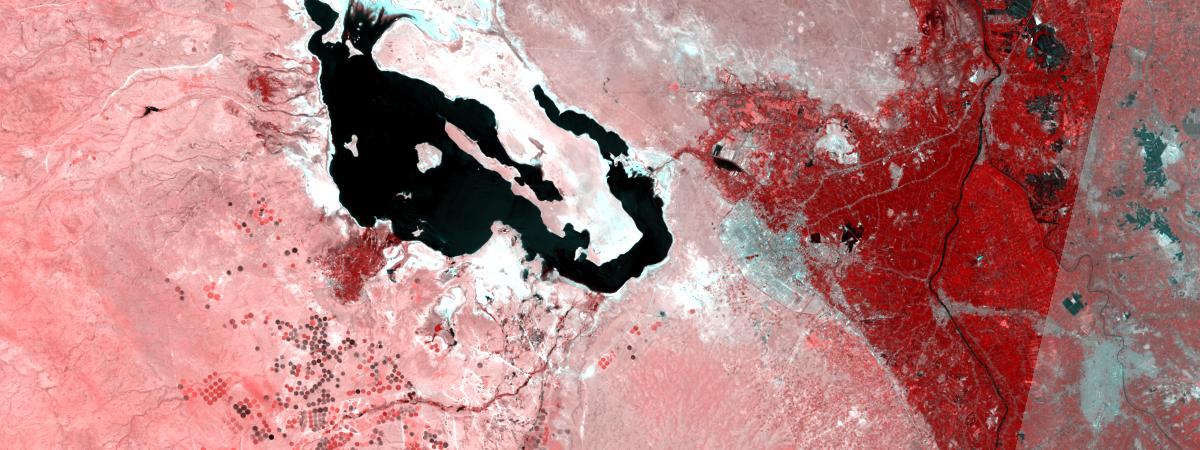

In [14]:
bahr_al_milh = extract_stretch([5, 1, 0])
bahr_al_milh.extent = {'xmax': 44.48, 'xmin': 43.13, 'ymax': 32.86, 'ymin': 32.4, 'spatialReference': 4326}
bahr_al_milh